In [1]:
import os
import sys

sys.path.insert(0, 'C:/Users/amanu/OneDrive/Desktop/KIFIYA_10_ACADEMY/TellCo/')

In [2]:
import pickle
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import sys
import os
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from plotting import PlotDataFrame

In [3]:
from scripts.utils import Util

In [8]:
df_tele = pd.read_csv("../data/cleaned_telecom_data.csv")
df_tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149996 entries, 0 to 149995
Data columns (total 56 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Unnamed: 0                        149996 non-null  int64  
 1   Bearer Id                         149996 non-null  int64  
 2   Start                             149996 non-null  object 
 3   Start ms                          149996 non-null  float64
 4   End                               149996 non-null  object 
 5   End ms                            149996 non-null  float64
 6   Dur. (ms)                         149996 non-null  float64
 7   IMSI                              149996 non-null  int64  
 8   MSISDN/Number                     149996 non-null  int64  
 9   IMEI                              149996 non-null  int64  
 10  Last Location Name                149996 non-null  object 
 11  Avg RTT DL (ms)                   149996 non-null  f

In [9]:
df_tele_user_engagement = df_tele[['MSISDN/Number', 'Bearer Id', 'Dur (ms)', 'Total Data Volume (Bytes)']]

In [10]:
#Grouping by 'MSISDN/Number and aggrigate metrics
df_tele_user_engagement = df_tele_user_engagement.groupby(
    'MSISDN/Number').agg({'Bearer Id': 'count', 'Dur (ms)': 'sum', 'Total Data Volume (Bytes)': 'sum'})
#Renaming columns:
df_tele_user_engagement = df_tele_user_engagement.rename(
    columns={'Bearer Id': 'xDR Sessions'})
df_tele_user_engagement.head(5)

xDR Sessions     Dur (ms)  Total Data Volume (Bytes)
MSISDN/Number                                                      
33601001722               1  116720140.0               8.786906e+08
33601001754               1  181230963.0               1.568596e+08
33601002511               1  134969374.0               5.959665e+08
33601007832               1   49878024.0               4.223207e+08
33601008617               2   37104453.0               1.457411e+09

### xDR sessions

In [11]:
df_tele_user_engagement.nlargest(10, 'xDR Sessions')

xDR Sessions      Dur (ms)  Total Data Volume (Bytes)
MSISDN/Number                                                       
33626320676              18  4.004764e+09               7.971167e+09
33614892860              17  3.897741e+09               8.846226e+09
33625779332              17  4.135444e+09               8.499621e+09
33659725664              16  3.490726e+09               7.705863e+09
33675877202              15  3.330379e+09               7.891111e+09
33760536639              15  3.394855e+09               8.514774e+09
33667163239              14  3.356921e+09               6.399571e+09
33603127838              12  2.853506e+09               4.976195e+09
33604515716              12  2.778279e+09               5.487855e+09
33627080969              12  2.780586e+09               5.754731e+09

In [12]:
df_tele_user_engagement.nlargest(10, 'Dur (ms)')

xDR Sessions      Dur (ms)  Total Data Volume (Bytes)
MSISDN/Number                                                       
33625779332              17  4.135444e+09               8.499621e+09
33626320676              18  4.004764e+09               7.971167e+09
33614892860              17  3.897741e+09               8.846226e+09
33659725664              16  3.490726e+09               7.705863e+09
33760536639              15  3.394855e+09               8.514774e+09
33667163239              14  3.356921e+09               6.399571e+09
33675877202              15  3.330379e+09               7.891111e+09
33603127838              12  2.853506e+09               4.976195e+09
33627080969              12  2.780586e+09               5.754731e+09
33604515716              12  2.778279e+09               5.487855e+09

In [13]:
df_tele_user_engagement.nlargest(10, 'Total Data Volume (Bytes)')

xDR Sessions      Dur (ms)  Total Data Volume (Bytes)
MSISDN/Number                                                       
33614892860              17  3.897741e+09               8.846226e+09
33760536639              15  3.394855e+09               8.514774e+09
33625779332              17  4.135444e+09               8.499621e+09
33626320676              18  4.004764e+09               7.971167e+09
33675877202              15  3.330379e+09               7.891111e+09
33659725664              16  3.490726e+09               7.705863e+09
33666464084              11  2.595424e+09               7.308501e+09
33760413819              12  2.675200e+09               7.132371e+09
33664712899              11  2.602277e+09               6.872347e+09
33698792269              11  2.637548e+09               6.540899e+09

In [14]:
#Creating instance of our util class
df_util = Util(df_tele_user_engagement)

<Axes: >

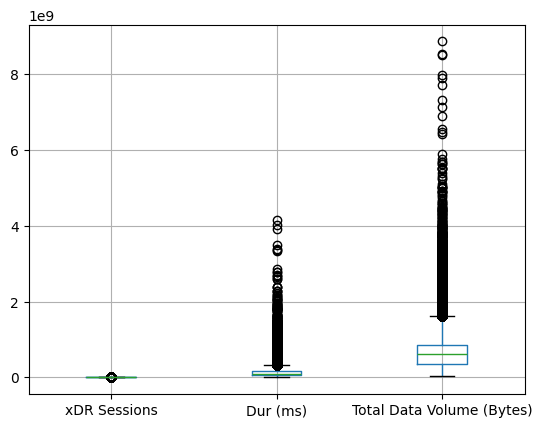

In [15]:
df_tele_user_engagement.boxplot()

In [16]:
df_util.getOverview(['xDR Sessions', 'Dur (ms)', 'Total Data Volume (Bytes)'])

Name of columns             Dur (ms) Total Data Volume (Bytes) xDR Sessions
Min                        7142988.0                33249009.0          1.0
Q1                        72116007.0               360382942.0          1.0
Median                   103194692.0               621070097.0          1.0
Q3                       172800059.0               861288713.0          2.0
Max                     4135444213.0              8846226494.0         18.0
IQR                      100684052.0               500905771.0          1.0
Lower fence              -78910071.0              -390975714.5         -0.5
Upper fence              323826137.0              1612647369.5          3.5
Skew                        5.557622                  2.261275     3.310131
Number_of_outliers              7031                      5373         3334
Percentage_of_outliers         4.69%                     3.58%        2.22%

In [17]:
#replace outliers in specified columns of a DataFrame with the upper and lower fences
df_util.replace_outliers_with_fences(['xDR Sessions', 'Dur (ms)', 'Total Data Volume (Bytes)'])

In [18]:
df_util.getOverview(['xDR Sessions', 'Dur (ms)', 'Total Data Volume (Bytes)'])

Name of columns        xDR Sessions     Dur (ms) Total Data Volume (Bytes)
Min                             1.0    7142988.0                33249009.0
Q1                              1.0   72116007.0               360382942.0
Median                          1.0  103194692.0               621070097.0
Q3                              2.0  172800059.0               861288713.0
Max                             3.5  323826137.0              1612647369.5
IQR                             1.0  100684052.0               500905771.0
Lower fence                    -0.5  -78910071.0              -390975714.5
Upper fence                     3.5  323826137.0              1612647369.5
Skew                       1.753716       0.8099                  0.761578
Number_of_outliers                0            0                         0
Percentage_of_outliers         0.0%         0.0%                      0.0%

In [19]:
df_tele_user_engagement.boxplot();

### Clustering

In [20]:
# Create an instance of the StandardScaler
scaler_instance = StandardScaler()
# Fit and transform the data using the scaler
# The StandardScaler is used to standardize the features by removing the mean and scaling to unit variance.
# The fit_transform method computes the mean and standard deviation of each feature and scales the data accordingly.
# The resulting scaled_data is a NumPy array containing the standardized values for each feature.
scaled_data = scaler_instance.fit_transform(df_tele_user_engagement)
scaled_data

array([[-0.55783479, -0.14805155,  0.52768147],
       [-0.55783479,  0.60778557, -1.28056557],
       [-0.55783479,  0.06576449, -0.1805661 ],
       ...,
       [-0.55783479,  1.35403523, -1.09202211],
       [-0.55783479,  1.35403523, -0.17976111],
       [-0.55783479,  1.35403523, -1.32492057]])

In [21]:
# Normalize the already scaled data using the normalize function
# The resulting normalized_data is a NumPy array where each row has been normalized.

normalized_data = normalize(scaled_data)
normalized_data

array([[-0.71333051, -0.18932073,  0.674772  ],
       [-0.36620246,  0.3989937 , -0.84065438],
       [-0.94547083,  0.11146383, -0.30604039],
       ...,
       [-0.30536606,  0.7412166 , -0.59778719],
       [-0.37808186,  0.91772004, -0.1218361 ],
       [-0.28247042,  0.6856419 , -0.67089913]])

In [22]:
# Apply k-means clustering with 3 clusters to the normalized data
kmeans = KMeans(n_clusters=3, random_state=1).fit(normalized_data)
kmeans.labels_

# The KMeans algorithm is used to partition the data into 'n_clusters' clusters.
# In this case, the number of clusters is set to 3.
# The 'random_state' parameter ensures reproducibility by seeding the random number generator.

# The 'fit' method performs the clustering on the normalized data.
# After fitting, the labels assigned to each data point are available in 'kmeans.labels_'.

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [23]:
df_tele_user_engagement.insert(0, 'cluster', kmeans.labels_)
df_tele_user_engagement

cluster  xDR Sessions      Dur (ms)  \
MSISDN/Number                                          
33601001722            1           1.0  1.167201e+08   
33601001754            0           1.0  1.812310e+08   
33601002511            0           1.0  1.349694e+08   
33601007832            1           1.0  4.987802e+07   
33601008617            2           2.0  3.710445e+07   
...                  ...           ...           ...   
33789996170            1           1.0  8.810688e+06   
33789997247            0           1.0  1.409887e+08   
3197020876596          0           1.0  2.449235e+08   
337000037000919        0           1.0  2.449235e+08   
882397108489451        0           1.0  2.449235e+08   

                 Total Data Volume (Bytes)  
MSISDN/Number                               
33601001722                   8.786906e+08  
33601001754                   1.568596e+08  
33601002511                   5.959665e+08  
33601007832                   4.223207e+08  
33601008617                   1.457411e+09  
...                                    ...  
33789996170                   7.146416e+08  
33789997247                   4.803073e+08  
3197020876596                 2.321240e+08  
337000037000919               5.962878e+08  
882397108489451               1.391536e+08  

[106853 rows x 4 columns]

In [24]:
df_tele_user_engagement['cluster'].value_counts()

cluster
1    53012
2    29296
0    24545
Name: count, dtype: int64

In [25]:
# Plot the clusters
import plotly.io as pio
pio.renderers.default = "notebook"
fig = px.scatter(df_tele_user_engagement, x='Total Data Volume (Bytes)', y='Dur (ms)',
                 color='cluster', size='xDR Sessions')
fig.show()

In [26]:
sns.pairplot(
    df_tele_user_engagement[['cluster','xDR Sessions', 'Dur (ms)', 'Total Data Volume (Bytes)']],
     hue = 'cluster', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height=4
);

In [27]:
cluster0 = df_tele_user_engagement[df_tele_user_engagement["cluster"]==0]
cluster0[['xDR Sessions', 'Dur (ms)', 'Total Data Volume (Bytes)']].describe()
#Statistical information for cluster0

xDR Sessions      Dur (ms)  Total Data Volume (Bytes)
count  24545.000000  2.454500e+04               2.454500e+04
mean       1.001263  1.720931e+08               4.886135e+08
std        0.035517  3.899745e+07               2.451542e+08
min        1.000000  1.154012e+08               3.357584e+07
25%        1.000000  1.410206e+08               2.762122e+08
50%        1.000000  1.625177e+08               4.852544e+08
75%        1.000000  1.911636e+08               7.008346e+08
max        2.000000  3.238261e+08               9.507607e+08

In [28]:
cluster1 = df_tele_user_engagement[df_tele_user_engagement["cluster"]==1]
cluster1[['xDR Sessions', 'Dur (ms)', 'Total Data Volume (Bytes)']].describe()
#Statistical information for cluster1

xDR Sessions      Dur (ms)  Total Data Volume (Bytes)
count  53012.000000  5.301200e+04               5.301200e+04
mean       1.007866  6.675320e+07               5.000462e+08
std        0.088343  3.144307e+07               2.429418e+08
min        1.000000  7.142988e+06               3.324901e+07
25%        1.000000  3.490081e+07               2.923391e+08
50%        1.000000  8.407933e+07               5.026388e+08
75%        1.000000  8.640067e+07               7.090619e+08
max        2.000000  1.251867e+08               9.492921e+08

In [29]:
cluster2 = df_tele_user_engagement[df_tele_user_engagement["cluster"]==2]
cluster2[['xDR Sessions', 'Dur (ms)', 'Total Data Volume (Bytes)']].describe()
#Statistical information for cluster2

xDR Sessions      Dur (ms)  Total Data Volume (Bytes)
count  29296.000000  2.929600e+04               2.929600e+04
mean       2.328850  2.068327e+08               1.122382e+09
std        0.553237  9.424585e+07               3.736289e+08
min        2.000000  1.514940e+07               1.418381e+08
25%        2.000000  1.283602e+08               8.404858e+08
50%        2.000000  1.986684e+08               1.122044e+09
75%        3.000000  3.167787e+08               1.476839e+09
max        3.500000  3.238261e+08               1.612647e+09

### Total Traffic

In [30]:
df_tele_user_app_engagement = df_tele[['MSISDN/Number', 'Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)',
    'Email Data Volume (Bytes)', 'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)',
    'Gaming Data Volume (Bytes)', 'Other Data Volume (Bytes)']]

In [31]:
# aggregating user engagement metrics per user

df_tele_user_app_engagement = df_tele_user_app_engagement.groupby(
    'MSISDN/Number').sum()
df_tele_user_app_engagement.head()

Social Media Data Volume (Bytes)  Google Data Volume (Bytes)  \
MSISDN/Number                                                                 
33601001722                           2232135.0                   4389005.0   
33601001754                           2660565.0                   5334863.0   
33601002511                           3195623.0                   3443126.0   
33601007832                            280294.0                   9678493.0   
33601008617                           2912542.0                  18499616.0   

               Email Data Volume (Bytes)  Youtube Data Volume (Bytes)  \
MSISDN/Number                                                           
33601001722                    1331362.0                   21624548.0   
33601001754                    3307781.0                   12432223.0   
33601002511                    3205380.0                   21333570.0   
33601007832                    2284670.0                    6977321.0   
33601008617                    3305469.0                   41533002.0   

               Netflix Data Volume (Bytes)  Gaming Data Volume (Bytes)  \
MSISDN/Number                                                            
33601001722                     27180981.0                8.124587e+08   
33601001754                     11221763.0                1.197501e+08   
33601002511                     19353900.0                5.388277e+08   
33601007832                      1942092.0                3.911261e+08   
33601008617                     49201724.0                1.314798e+09   

               Other Data Volume (Bytes)  
MSISDN/Number                             
33601001722                  386570872.0  
33601001754                  281710071.0  
33601002511                  501693672.0  
33601007832                   35279702.0  
33601008617                  804804484.0

In [32]:
youtube = df_tele_user_app_engagement.nlargest(10, "Youtube Data Volume (Bytes)")['Youtube Data Volume (Bytes)']
netflix = df_tele_user_app_engagement.nlargest(10, "Netflix Data Volume (Bytes)")['Netflix Data Volume (Bytes)']
gaming = df_tele_user_app_engagement.nlargest(10, "Gaming Data Volume (Bytes)")['Gaming Data Volume (Bytes)']
email = df_tele_user_app_engagement.nlargest(10, "Email Data Volume (Bytes)")['Email Data Volume (Bytes)']
google = df_tele_user_app_engagement.nlargest(10, "Google Data Volume (Bytes)")['Google Data Volume (Bytes)']
social_media = df_tele_user_app_engagement.nlargest(10, "Social Media Data Volume (Bytes)")['Social Media Data Volume (Bytes)']
other = df_tele_user_app_engagement.nlargest(10, "Other Data Volume (Bytes)")['Other Data Volume (Bytes)']

In [33]:
distortions, inertias =  df_util.choose_kmeans(normalized_data, 20)

In [34]:
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("Distortion", "Inertia")
)
fig.add_trace(go.Scatter(x=np.array(range(1, 20)), y=distortions), row=1, col=1)
fig.add_trace(go.Scatter(x=np.array(range(1, 20)), y=inertias), row=1, col=2)
fig.update_layout(title_text="The Elbow Method", height=500)
fig.show()

In [35]:
kmeans = KMeans(n_clusters=6, random_state=6).fit(normalized_data)
kmeans.labels_
#Using the elbow method it is suggested that k=6 is an optimal number of cluster

array([2, 5, 5, ..., 5, 3, 5], dtype=int32)

In [36]:
#Saving the dataframe
df_tele_user_engagement.to_csv('../data/telecom_user_engagement_data.csv')

In [38]:
#Saving the clustering model
with open("../models/telecom_user_engagement.pkl", "wb") as f:
    pickle.dump(kmeans, f)